In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torchvision
from core.dataset import dataset_fn
from utils.config import load_config


diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [False]
diagnoses_comorbidities [False]
diagnoses_comorbidities [False]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
session_image_quality ['Adequate']
session_image_quality ['Adequate']
session_image_quality ['Adequate']
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
session_image_quality ['Good']
session_image_quality ['Good']
session_image_quality ['Good']
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
diagnoses_comorbidities [True]
session_image_quality ['Excellent']
session_image_quality ['Excellent']
session_image_quality ['Excellent']
diagnoses_comorbidities [True]
diagnoses

ValueError: unknown file extension: 

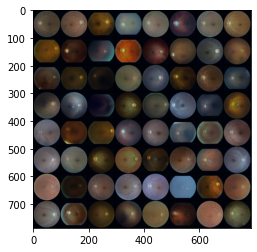

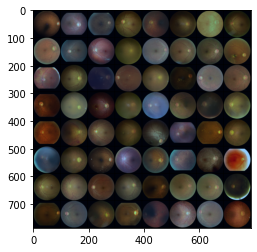

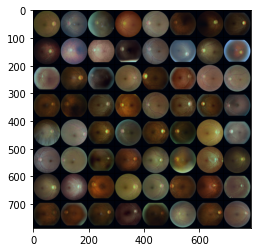

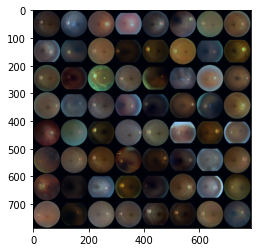

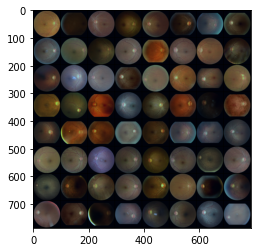

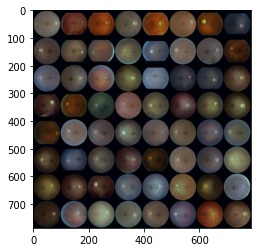

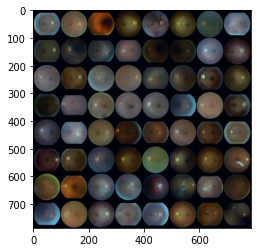

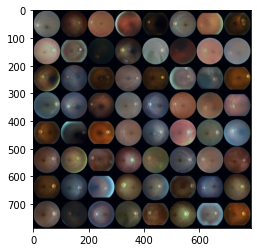

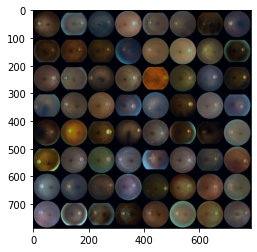

In [5]:

# Eyepacs

def get_img_grid(params, out_fig='fig.pdf'):
    dataloader = dataset_fn(params_dict=params["dataset"])

    _, (x, *_) = next(enumerate(dataloader["train"]["p"]))
    # _, (y, *_) = next(enumerate(dataloader["train"]["q"]))

    img_grid = torchvision.utils.make_grid(x, normalize=True)
    img_grid = np.transpose(img_grid, (1, 2, 0)).numpy()
    
    fig, ax = plt.subplots()
    plt.imshow(img_grid)
    plt.imsave(out_fig, img_grid)



config_file = "../config/lightning/eyepacs_example_images.yaml"

subgroups = [
    {'filename': 'all.png', 'subset_params': {}},
    {'filename': 'co_morbid_true.png', 'subset_params': {"diagnoses_comorbidities":  [True]}},
    {'filename': 'co_morbid_false.png', 'subset_params': {"diagnoses_comorbidities":  [False]}},
    {'filename': 'quality_adequate.png', 'subset_params': {"session_image_quality":  ["Adequate"]}},
    {'filename': 'quality_good.png', 'subset_params': {"session_image_quality":  ["Good"]}},
    {'filename': 'quality_excellent.png', 'subset_params': {"session_image_quality":  ["Excellent"]}},
    {'filename': 'gender_female.png', 'subset_params': {"patient_gender":  ["Female"]}},
    {'filename': 'gender_male.png', 'subset_params': {"patient_gender":  ["Male"]}},
             ]

ethnicities = [ "Latin American", "Caucasian",
        "African Descent",
        "Asian",
        "Indian subcontinent origin",
        "Native American",
        "Multi-racial"]

for ethnicity in ethnicities:
    subgroups.append({'filename': f'ethnicity_{ethnicity}', 'subset_params': {"patient_ethnicity": [ethnicity]}})

# out_dir = "/home/lkoch/Dropbox/BerensLab/Papers/2022_tmi_subgroups/figures"
out_dir = "."

for ele in subgroups:
    params = load_config(config_file)
    params["dataset"]["ds"]["p"]["subset_params"] = ele["subset_params"]
    img_grid = get_img_grid(params, ele["filename"])
    

# params = load_config(config_file)
# img_grid = get_img_grid(params, 'all.png')


# params = load_config(config_file)
# params["dataset"]["ds"]["p"]["subset_params"]["diagnoses_comorbidities"] = [True]
# img_grid = get_img_grid(params, 'co_morbid_true.png')

# # params["dataset"]["ds"]["p"]["subset_params"]["diagnoses_comorbidities"] = [False]
# # img_grid = get_img_grid(params, 'co_morbid_false.png')


# params = load_config(config_file)
# params["dataset"]["ds"]["p"]["subset_params"]["session_image_quality"] = ["Adequate"]
# img_grid = get_img_grid(params, 'quality_adequate.png')






